# Heart Attack Project

## Imports

In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Reading Data

In [123]:
df = pd.read_csv("heart.csv")

print(df.shape)
df.head()

(303, 14)


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Output Histogram

<Axes: >

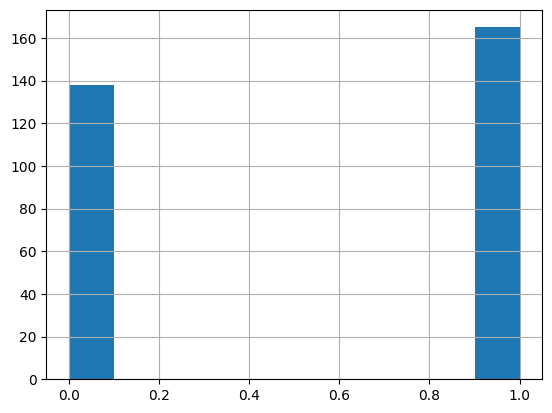

In [124]:
df["output"].hist()

## Separating Data

In [125]:
print(df.columns)

x_data = df[["age", "sex", "cp", "trtbps", "chol", "fbs", "restecg", "thalachh", "exng", "oldpeak", "slp", "caa", "thall"]]
y_data = df["output"]

y_data.value_counts()

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')


output
1    165
0    138
Name: count, dtype: int64

## Normalizing Data

In [126]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(x_data)
x_data = scaler.fit_transform(x_data.astype(float))

x_data[0]

array([ 0.9521966 ,  0.68100522,  1.97312292,  0.76395577, -0.25633371,
        2.394438  , -1.00583187,  0.01544279, -0.69663055,  1.08733806,
       -2.27457861, -0.71442887, -2.14887271])

## Selecting Train & Test Data

In [127]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=4)

print(f"Train Data: x: {x_train.shape}, y: {y_train.shape}")
print(f"Test Data: x: {x_test.shape}, y: {y_test.shape}")

Train Data: x: (242, 13), y: (242,)
Test Data: x: (61, 13), y: (61,)


## K-Nearest Neighbor Classifying (KNN Classifying)

In [128]:
from sklearn.neighbors import KNeighborsClassifier

k = 10

neighbors = KNeighborsClassifier(k).fit(x_train, y_train)
predicted_y = neighbors.predict(x_test)

print(y_test[0:5])
print(predicted_y[0:5])

113    1
249    0
18     1
142    1
299    0
Name: output, dtype: int64
[0 0 1 1 0]


## KNN Evaluation

In [129]:
from sklearn.metrics import accuracy_score

predicted_y_train = neighbors.predict(x_train)
predicted_y_test = neighbors.predict(x_test)

print(f"Train Data Accuracy: {accuracy_score(y_train, predicted_y_train)}")
print(f"Test Data Accuracy: {accuracy_score(y_test, predicted_y_test)}")

Train Data Accuracy: 0.8388429752066116
Test Data Accuracy: 0.8524590163934426


## Calculating The Best K

In [130]:
max_k = 40

mean_accuracies = np.zeros(max_k - 1)

for k in range(1, max_k):
    neighbors = KNeighborsClassifier(k).fit(x_train, y_train)
    predicted_y = neighbors.predict(x_test)

    mean_accuracies[k - 1] = accuracy_score(y_test, predicted_y)

print(f"The best accuracy is \"{max(mean_accuracies)}\" with \"k = {mean_accuracies.argmax() + 1}\" ")

The best accuracy is "0.8852459016393442" with "k = 37" 


## Predicting a Data with KNN

In [134]:
# age, sex, cp, trtbps, chol, fbs, restecg, thalachh, exng, oldpeak, slp, caa, thall
new_record = np.array([[55, 1, 0, 140, 217, 0, 1, 111, 1, 5.6, 0, 0, 3]])

normalized_record = scaler.fit_transform(new_record.astype(float))

neighbors.predict(normalized_record)[0]


np.int64(1)